### 绘制最简单的正弦函数图
- 安装必要的依赖库：matplotlib numpy
- 导入
- 构造数据
- 绘制图像并展示

In [2]:
!pip install matplotlib numpy

Looking in indexes: http://mirrors.aliyun.com/pypi/simple/
     |████████████████████████████████| 8.5 MB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 8.7 MB/s eta 0:00:011
     |████████████████████████████████| 2.2 MB 3.6 MB/s eta 0:00:01


In [3]:
import matplotlib.pyplot as plt
import numpy as np

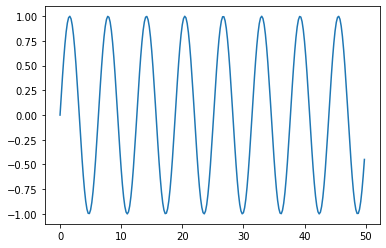

In [6]:
# 生成数据
x = np.arange(0,50,0.2)
y = np.sin(x)
# 生成图形
plt.plot(x,y)
plt.show()

## 多维数据

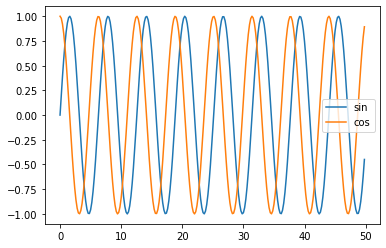

In [23]:
z = np.cos(x)

flg, axs = plt.subplots()

axs.plot(x, y, label="sin")
axs.plot(x, z, label="cos")

plt.legend()
plt.show()

# 使用 pandas 和 seaborn

In [27]:
!pip install pandas seaborn

Looking in indexes: http://mirrors.aliyun.com/pypi/simple/
     |████████████████████████████████| 10.3 MB 5.1 MB/s eta 0:00:01
     |████████████████████████████████| 285 kB 6.4 MB/s eta 0:00:01
     |████████████████████████████████| 30.7 MB 6.2 MB/s eta 0:00:01


## 散点图

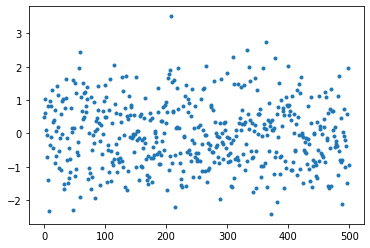

In [37]:
x = np.random.randn(500)
plt.plot(x,'.')
plt.show()

# 直方图

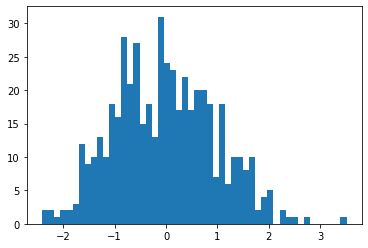

In [42]:
plt.hist(x,bins=50) # bins 指的是总数据分为几段
plt.show()

## 核密度估计图

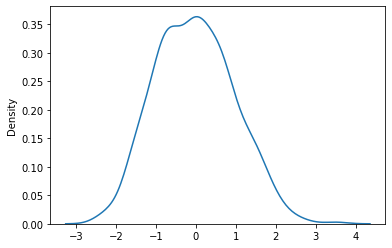

In [45]:
import seaborn as sns
sns.kdeplot(x)
plt.show()

## 累积频率

In [46]:
!pip install scipy

Looking in indexes: http://mirrors.aliyun.com/pypi/simple/


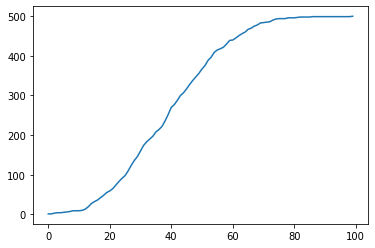

In [51]:
import scipy.stats as stats
plt.plot(stats.cumfreq(x,numbins=100)[0])
plt.show()

## 误差条图

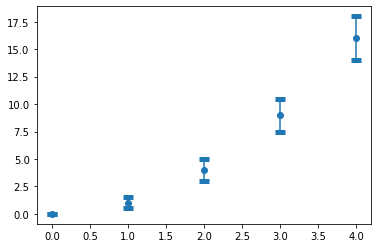

In [64]:
indexs = np.arange(5)
y = indexs**2
errorBar = indexs/2
plt.errorbar(indexs,y,yerr=errorBar,fmt='o',capsize=5,capthick=5)
plt.show()

## 箱形图

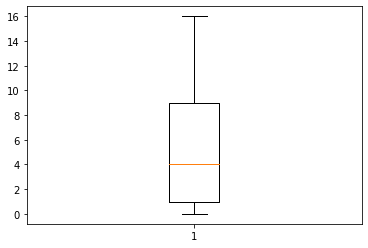

In [83]:
plt.boxplot(y, sym='*')
plt.show()

## 小提琴图

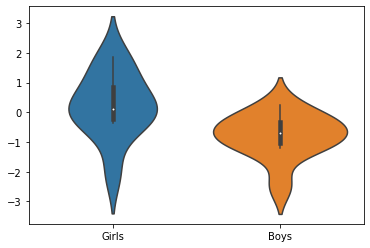

In [89]:
import pandas as pd
nd = stats.norm
data = nd.rvs(size=(10))

nd2 = stats.norm(loc = 3,scale = 1.5)
data2 = nd.rvs(size=(10))

df = pd.DataFrame({'Girls':data,'Boys':data2})

sns.violinplot(data=df)

plt.show()

## 分组的条形图

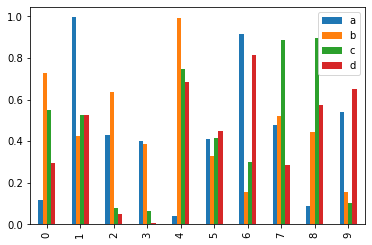

In [96]:
df = pd.DataFrame(np.random.rand(10,4),columns=['a','b','c','d'])
df.plot(kind='bar',grid=False)
plt.show()

In [97]:
df

,a,b,c,d
0,0.117074,0.727410,0.548213,0.295072
1,0.995166,0.424628,0.526981,0.526970
2,0.428101,0.635475,0.077685,0.050876
3,0.400387,0.388852,0.065352,0.005239
4,0.039041,0.991574,0.748458,0.684903
5,0.409224,0.330052,0.416098,0.446740
6,0.916624,0.155249,0.302247,0.811797
7,0.475498,0.519543,0.887741,0.285576
8,0.088711,0.442764,0.894713,0.573151
9,0.541689,0.155093,0.100609,0.653037


## 饼图

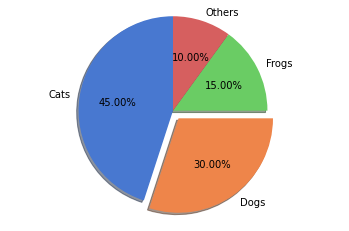

In [107]:
txtLabels = 'Cats', 'Dogs', 'Frogs', 'Others'
fractions = [45, 30, 15, 10]
offsets = (0, 0.1, 0, 0)
plt.pie(fractions, explode=offsets, 
        labels=txtLabels, autopct='%1.2f%%', shadow=True, startangle=90,colors=sns.color_palette('muted'))

plt.axis('equal')

plt.show()

## 二元变量散点图

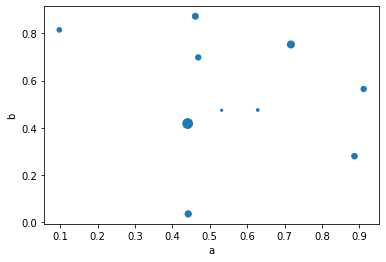

In [116]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df2['c'] = df2['c']*100
df2.plot(kind='scatter', x='a', y='b', s='c')
plt.show()

In [117]:
df2

,a,b,c,d
0,0.441004,0.418437,95.168696,0.276150
1,0.461488,0.872548,34.872142,0.896205
2,0.469311,0.698398,28.675841,0.690061
3,0.531979,0.474684,4.918595,0.716596
4,0.442359,0.036021,39.455470,0.242632
5,0.628349,0.475866,7.342256,0.320240
6,0.886907,0.280355,31.265840,0.877464
7,0.911471,0.564695,28.655929,0.606575
8,0.097791,0.814775,20.643468,0.530012
9,0.717014,0.753088,49.681749,0.740139


## 3D 图

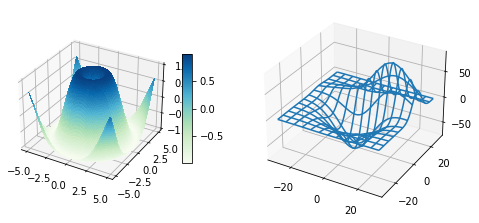

In [148]:
from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import get_test_data

fig = plt.figure(figsize=plt.figaspect(0.5))

ax = fig.add_subplot(1, 2, 1, projection='3d')
X = np.arange(-5,5,0.1)
Y = np.arange(-5,5,0.1)
X,Y = np.meshgrid(X,Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap=cm.GnBu,linewidth=0,antialiased=False)
ax.set_zlim3d(-1.01,1.01)
fig.colorbar(surf,shrink=0.5,aspect=10)

ax = fig.add_subplot(1, 2, 2, projection='3d')
X, Y, Z = get_test_data(0.05)

ax.plot_wireframe(X, Y, Z,rstride=10,cstride=10)

plt.show()